In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
pip install imports

In [ ]:
pip install expects

In [ ]:
from expects import *
from PIL import Image
import glob
import os
import pandas as pd
import numpy as np
import json
from csv import writer
import gc
import sys


# Data Processing

In [ ]:
ui_vectors = np.load('/content/gdrive/MyDrive/CS538/Final_project/ui_layout_vectors/ui_vectors.npy')

Transforming names of UI images into a usable array

In [ ]:
with open('/content/gdrive/MyDrive/CS538/Final_project/ui_layout_vectors/ui_names.json') as f:
  ui_names = json.load(f)

In [ ]:
 data = list(ui_names)
 uiNames_array = np.array(data)

Importing images of UI's using pillow takes around 13-22 minutes


In [ ]:
#ui_images = []
#ui_imageNames= []

#for filename in glob.glob('/content/gdrive/MyDrive/CS538/Final_project/ui_images/*.jpg'): #assuming jpg
##    im=Image.open(filename)
 #   ui_images.append(im)
 #   #append filename minus .jpg
 #   base=os.path.basename(filename)
 #   imageName = os.path.splitext(base)
 #   imageName = os.path.splitext(base)[0]
 #   ui_imageNames.append(imageName)

In [ ]:
ui_images = []
ui_imageNames= []

size = 32, 32

for infile in glob.glob('/content/gdrive/MyDrive/CS538/Final_project/ui_images/*.jpg'): #assuming jpg
    outfile = os.path.splitext(infile)[0] + ".thumbnail"
    if infile != outfile:
        try:
            im = Image.open(infile)
            im.thumbnail(size, Image.ANTIALIAS)
            ui_images.append(im)
            #append filename minus .jpg
            base=os.path.basename(infile)
            imageName = os.path.splitext(base)
            imageName = os.path.splitext(base)[0]
            ui_imageNames.append(imageName)
        except IOError:
            print ("cannot create thumbnail for '%s'" % infile)

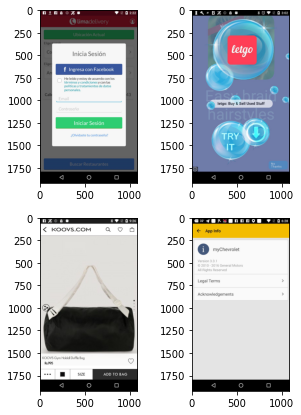

In [ ]:

# create figure
fig = plt.figure(figsize=(5, 7))
  
# setting values to rows and column variables
rows = 2
columns = 2
  
# reading images
Image1 = ui_images[0]
Image2 = ui_images[10]
Image3 = ui_images[22]
Image4 = ui_images[500]
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image1)

  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Image2)

  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(Image3)

  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(Image4)

dropping file extensions for ui_vectors 

In [ ]:
ui_names_noExtension = [os.path.splitext(x)[0] for x in uiNames_array]

The RICO database as different UI layout images transformed into one dimensional vecotors. However, RICO doesnt supply the full 72k image set it is around 3.7k this is fine since this is only a tutorial of software implementation

In [ ]:
realImages = pd.DataFrame ({'image':ui_images, 'name':ui_imageNames})
realImages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   3701 non-null   object
 1   name    3701 non-null   object
dtypes: object(2)
memory usage: 58.0+ KB


Converting our array to a list and putting it into a dataframe to merge with the images that we actually have

In [ ]:
ui_vectors = ui_vectors.tolist() 

In [ ]:
vectorImages = pd.DataFrame({'imageName':ui_names_noExtension, 'vector':ui_vectors})
vectorImages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72103 entries, 0 to 72102
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   imageName  72103 non-null  object
 1   vector     72103 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


merge the two dataframes on same image names

In [ ]:
dfinal = realImages.merge(vectorImages, how='inner', left_on='name', right_on='imageName')

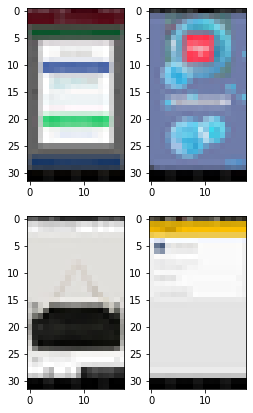

In [ ]:
import matplotlib.pyplot as plt

# create figure
fig = plt.figure(figsize=(4, 7))
  
# setting values to rows and column variables
rows = 2
columns = 2
  
# reading images
Image1 = dfinal.image[0]
Image2 = dfinal.image[10]
Image3 = dfinal.image[22]
Image4 = dfinal.image[500]
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image1)

  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Image2)

  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(Image3)

  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(Image4)



# vector creation
We can transform our image's into vectors.

Note this distroys ram, do in parts Just using this part for creation of data

In [ ]:
def image_to_vector(image: np.ndarray) -> np.ndarray:
    """
    Args:
    image: numpy array of shape (length, height, depth)

    Returns:
     v: a vector of shape (length x height x depth, 1)
    """
    length, height, depth = image.shape
    gc.collect()
    return image.reshape((length * height * depth, 1))
listX = [] #vector
listy = [] #name
def imageVector(df):
  for index, row in df.iterrows():
    gc.collect()
    imageV = image_to_vector(np.asarray(row['image'])) # converting to a vector
    listX.append(imageV)
    listy.append(row['name'])
    gc.collect()

In [ ]:
# call image vector
imageVector(dfinal)

making a simple dataframe for found simple vector to calculate distance

In [ ]:
distanceMeasure = pd.DataFrame({'image_name': listy, 'simple_vector':listX})

In [ ]:
distanceMeasure.head(5)

,image_name,simple_vector
0,61979,"[[107], [61], [70], [89], [39], [48], [102], [..."
1,62023,"[[78], [77], [76], [84], [83], [82], [75], [75..."
2,62028,"[[96], [105], [108], [100], [108], [113], [92]..."
3,62020,"[[50], [50], [50], [95], [95], [95], [92], [92..."
4,62048,"[[55], [55], [59], [61], [60], [66], [46], [48..."


For each object in distanceMeasure cacluate the distance between each point minus itself -- 30 minutes

In [ ]:
x1 =[]
x2 = []
d = []
index = 0
for t, n in distanceMeasure.iterrows():
  comp1 = n['simple_vector']
  for u, m in distanceMeasure.iterrows():
    comp2 = m['simple_vector']
    dist = np.linalg.norm(comp1-comp2 ) # calucate distance 
    x1.append(n['image_name']) # current image
    x2.append(m['image_name']) # compare image
    d.append(dist)

In [ ]:
len(x1)

13675204

In [ ]:
len(x2)

13675204

In [ ]:
t = np.array(d)

In [ ]:
t.shape

(13675204,)

In [ ]:
dm = pd.DataFrame(index = x1, columns = x2)

for i in len(x1):
  for j in len(x2):
    dm.append(d)

MemoryError: ignored

In [ ]:
dfinalTest = dfinal.merge(dfTest, how='left', left_on='name', right_on='sName')
dfinalTest.to_csv ('/content/gdrive/MyDrive/CS538/Final_project/export_dataframe.csv',sep=",", float_format="%.2f",index=False,encoding="utf-8")
simpleVector = pd.read_csv('/content/gdrive/MyDrive/CS538/Final_project/export_dataframe.csv')